In [9]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [10]:
data = Image.open('images.jpg')

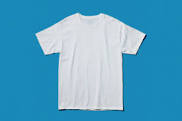

In [11]:
# plt.imshow(image)
data

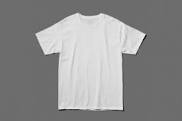

In [12]:
data = image.convert('L')
data

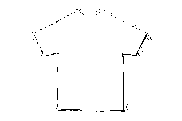

In [13]:
data.point(lambda x: 0 if x<100 else 255)

In [14]:
data = cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE)

In [15]:
data = np.array(data)

In [16]:
data =cv2.resize(data,(28,28))

In [17]:
data.shape

(28, 28)

In [19]:
data

array([[109, 109, 109, 109, 109, 108, 108, 108, 108, 108, 108, 108, 108,
        108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 109, 109, 108,
        109, 109],
       [109, 109, 109, 109, 109, 108, 108, 108, 108, 108, 108, 108, 108,
        108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 109, 109, 108,
        109, 109],
       [109, 109, 109, 109, 109, 109, 109, 108, 108, 108, 110, 103, 111,
        110, 107, 111, 110, 108, 108, 108, 108, 108, 108, 109, 109, 108,
        109, 109],
       [109, 109, 109, 109, 109, 109, 109, 108, 108, 108, 103, 213, 191,
        118, 136, 231, 179, 108, 108, 108, 108, 108, 108, 109, 109, 108,
        109, 109],
       [109, 109, 109, 109, 109, 108, 109, 106, 111, 120, 214, 224, 207,
        211, 209, 224, 222, 217, 103, 108, 108, 109, 108, 109, 109, 109,
        109, 109],
       [109, 109, 109, 109, 109, 108, 110, 107, 151, 207, 218, 221, 222,
        213, 219, 222, 217, 224, 224, 111, 106, 110, 108, 109, 109, 109,
        109, 109],
       [10

In [20]:
data = data/255

In [21]:
data

array([[0.42745098, 0.42745098, 0.42745098, 0.42745098, 0.42745098,
        0.42352941, 0.42352941, 0.42352941, 0.42352941, 0.42352941,
        0.42352941, 0.42352941, 0.42352941, 0.42352941, 0.42352941,
        0.42352941, 0.42352941, 0.42352941, 0.42352941, 0.42352941,
        0.42352941, 0.42352941, 0.42352941, 0.42745098, 0.42745098,
        0.42352941, 0.42745098, 0.42745098],
       [0.42745098, 0.42745098, 0.42745098, 0.42745098, 0.42745098,
        0.42352941, 0.42352941, 0.42352941, 0.42352941, 0.42352941,
        0.42352941, 0.42352941, 0.42352941, 0.42352941, 0.42352941,
        0.42352941, 0.42352941, 0.42352941, 0.42352941, 0.42352941,
        0.42352941, 0.42352941, 0.42352941, 0.42745098, 0.42745098,
        0.42352941, 0.42745098, 0.42745098],
       [0.42745098, 0.42745098, 0.42745098, 0.42745098, 0.42745098,
        0.42745098, 0.42745098, 0.42352941, 0.42352941, 0.42352941,
        0.43137255, 0.40392157, 0.43529412, 0.43137255, 0.41960784,
        0.43529412, 0.4313

In [23]:
data = cv2.bitwise_not(data)

In [25]:
from keras.models import load_model

In [26]:
model = load_model('fashionModel.h5')

In [27]:
model.predict(data.reshape(1,28,28))

1/1 [==============================] - 0s 125ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [28]:
def predict_image(image_data):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    data = Image.open(image_data)
    data = data.convert('L')
    data = data.point(lambda x:0 if x<100 else 255)
    data = data.save('saved_image.jpg')
    data = cv2.imread('saved_image.jpg',cv2.IMREAD_GRAYSCALE)
    data = cv2.bitwise_not(data)
    data = cv2.resize(data,(28,28))
    data = data/255
    data = data.reshape(1,28,28)
    predict = model.predict(data)
    predicted_class = np.argmax(predict)
    score = np.amax(predict)
    print(f'Prediction Report:/nPredicted class: {class_names[predicted_class]}/nConfidence level:{score:.2%}')

In [29]:
predict_image('images.jpg')

1/1 [==============================] - 0s 24ms/step
Prediction Report:/nPredicted class: T-shirt/top/nConfidence level:60.75%
